In [1]:
import os
from cvt import histogram

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image   


notebook_dir = os.path.abspath("")

images_dir = os.path.join(os.path.abspath(os.path.join(notebook_dir,"..", "data", "test_images")))

print(images_dir)

list_images = os.listdir(images_dir)
i = 0
for image_name in list_images:
    print(f"image {i}: {image_name}\n")
    i += 1

/home/yasin/Projects/computer-vision-toolkit/data/test_images
image 0: tree.bmp

image 1: palm.bmp

image 2: pale_blue_dot.tif

image 3: pepper.bmp

image 4: BoatsColor.bmp

image 5: boats.bmp

image 6: fbtaraftar.bmp

image 7: airplane.bmp

image 8: goldhill.bmp

image 9: baboon.bmp

image 10: barbara.bmp

image 11: lenna.bmp

image 12: low_contrast_lenna.bmp



In [7]:

image = Image.open(os.path.join(images_dir, list_images[3]))
#image = image.convert("L")

np_image = np.array(image)


for i in range(1000):
    equalized_image = histogram.equalize(np_image)
shape = equalized_image.shape

print(f"shape: {shape}")

shape: (512, 512, 3)


In [8]:
def show_pmf(np_image, title, cmap=None):
    
    if len(np_image.shape) == 2:  # Grayscale image
        cmap = "gray"
    elif cmap is None:  # Default to None for color images
        cmap = None


    keys = np.unique(np_image).sort()
    pmf = histogram.pmf_calculate(np_image)


    pmf_dict = dict()
    for i in range(256):
        pmf_dict[i] = pmf[i]
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.title(title)
    plt.imshow(np_image, cmap=cmap, vmin=0, vmax=255)  # Set fixed range
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("PMF")
    plt.bar(pmf_dict.keys(), pmf_dict.values(), width=1.0, color="blue", alpha=0.7)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    xticks = np.arange(0, 256, 20)
    plt.xticks(xticks)

    plt.tight_layout()

    plt.show()


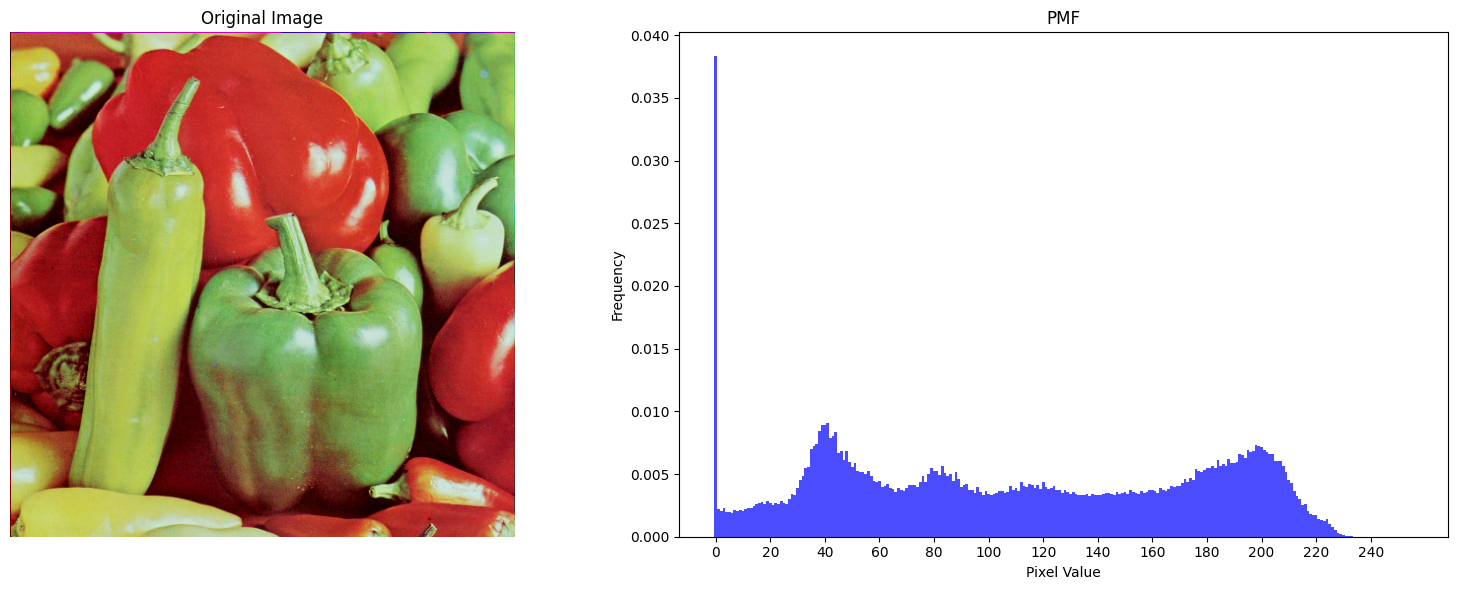

In [9]:
show_pmf(np_image, "Original Image")

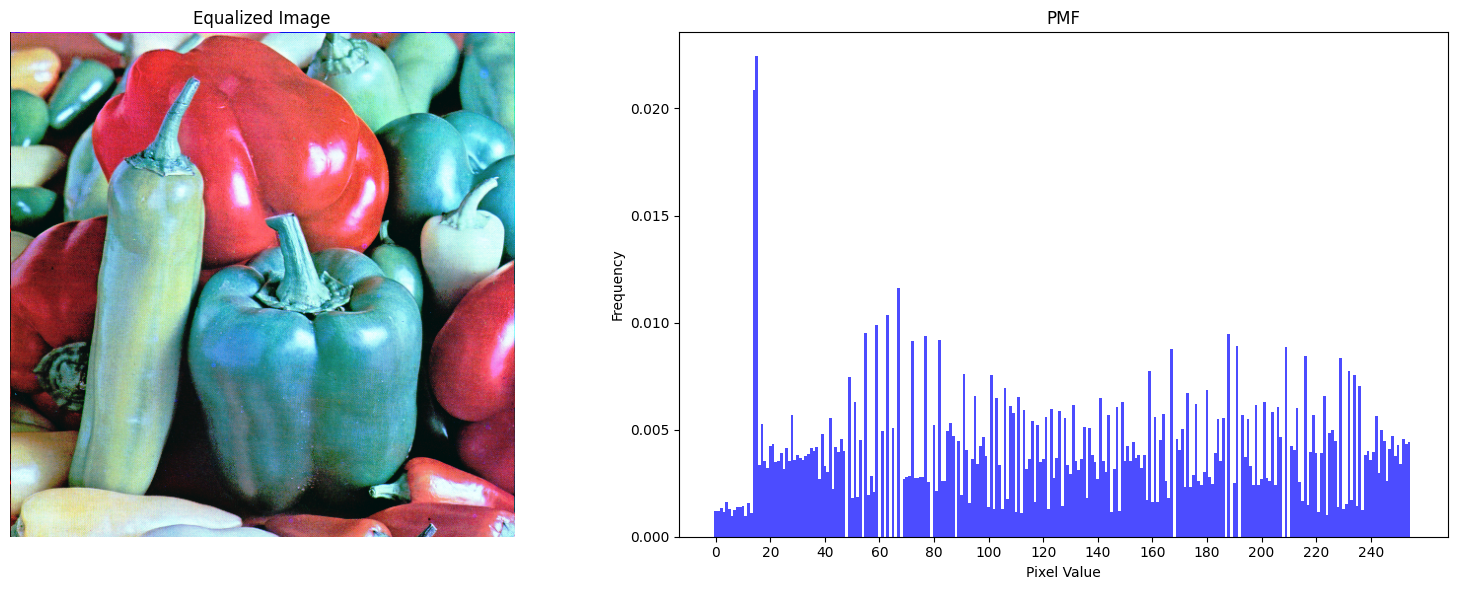

In [10]:
show_pmf(equalized_image, "Equalized Image")

ValueError: cannot reshape array of size 786432 into shape (512,512)

In [ ]:
show_pmf(equalized_image, "Equalized Image")